# 4.1 多层感知机

## 4.1.1 隐藏层

### 线性模型可能出错

### 在网络中加入隐藏层
多层感知机（multilayer perceptron），通常缩写为MLP：

前L−1层看作表示，把最后一层看作线性预测器。

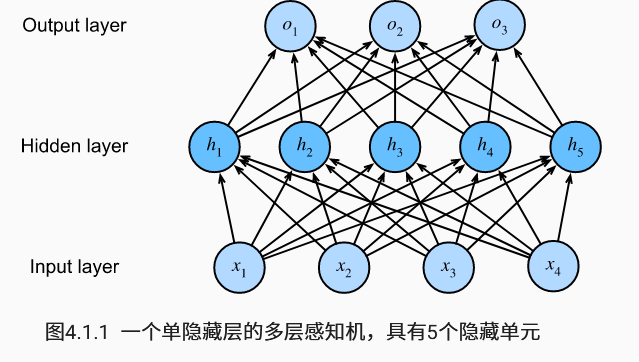

### 从线性到非线性
在仿射变换之后对每个隐藏单元应用非线性的激活函数（activation function）σ

有了激活函数，就不可能再将我们的多层感知机退化成线性模型

### 通用近似定理

## 4.1.2 激活函数
激活函数通过计算加权和并加上偏置来确定神经元是否应该被激活。

它们是将输入信号转换为输出的可微运算。

大多数激活函数都是非线性的。

In [3]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU函数
ReLU函数通过将相应的激活值设为0来仅保留正元素并丢弃所有负元素

给定元素$x$，ReLU函数被定义为该元素与$0$的最大值：

（**$$\operatorname{ReLU}(x) = \max(x, 0).$$**）

当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1。注意，当输入值精确等于0时，ReLU函数不可导。在此时，我们默认使用左侧的导数，即当输入为0时导数为0。

使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题

注意，ReLU函数有许多变体，包括*参数化ReLU*（Parameterized ReLU，*pReLU*）函数 。该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

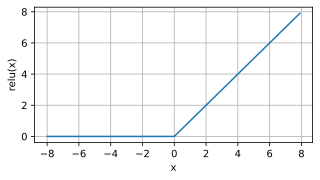

In [4]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))


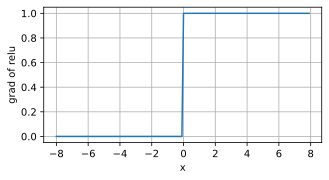

In [5]:
# 绘制ReLU函数的导数
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))


### sigmoid函数
[**对于一个定义域在$\mathbb{R}$中的输入，*sigmoid函数*将输入变换为区间(0, 1)上的输出**]。因此，sigmoid通常称为*挤压函数*（squashing function）：它将范围(-inf, inf)中的任意输入压缩到区间(0, 1)中的某个值：

（**$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$**）

注意，当输入接近0时，sigmoid函数接近线性变换。

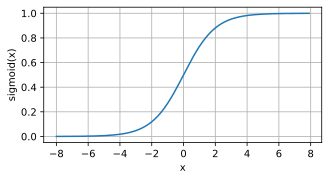

In [7]:
# 绘制sigmoid函数
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))


sigmoid函数的导数为下面的公式：

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

sigmoid函数的导数图像如下所示。注意，当输入为0时，sigmoid函数的导数达到最大值0.25。而输入在任一方向上越远离0点，导数越接近0。

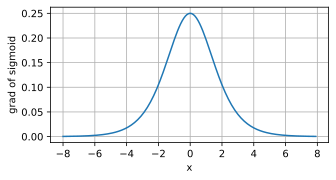

In [8]:
# sigmoid函数的导数图像
# 清除以前的梯度。
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))


### tanh函数
与sigmoid函数类似，[**tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上**]。tanh函数的公式如下：

（**$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$**）

注意，当输入在0附近时，tanh函数接近线性变换。函数的形状类似于sigmoid函数，不同的是tanh函数关于坐标系原点中心对称。

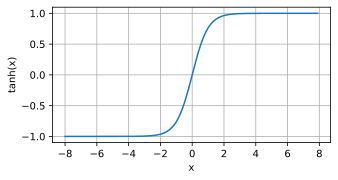

In [9]:
# 绘制tanh函数
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))


tanh函数的导数是：

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

当输入接近0时，tanh函数的导数接近最大值1。与我们在sigmoid函数图像中看到的类似，输入在任一方向上越远离0点，导数越接近0。


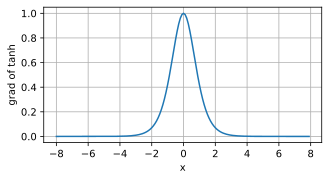

In [10]:
# tanh函数的导数图像
# 清除以前的梯度。
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))


## 4.1.3 小结
* 多层感知机在输出层和输入层之间增加一个或多个全连接的隐藏层，并通过激活函数转换隐藏层的输出。
* 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。


## 4.1.4 练习

1. 计算pReLU激活函数的导数。
1. 证明一个仅使用ReLU（或pReLU）的多层感知机构造了一个连续的分段线性函数。
1. 证明$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$。
1. 假设我们有一个非线性单元，将它一次应用于一个小批量的数据。你认为这会导致什么样的问题？